# Lab 01. OpenCV를 이용한 얼굴 정렬 실습
---

## 1. 얼굴 및 눈 감지를 위해 OpenCV Haar 캐스케이드 구성

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 캐스케이드 파일 읽기 

In [14]:
face_cascade = cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./data/haarcascade_eye.xml")

print(face_cascade, eye_cascade)

<CascadeClassifier 000002808C2D91F0> <CascadeClassifier 00000280E7188210>


### 얼굴 이미지 데이터 읽기 

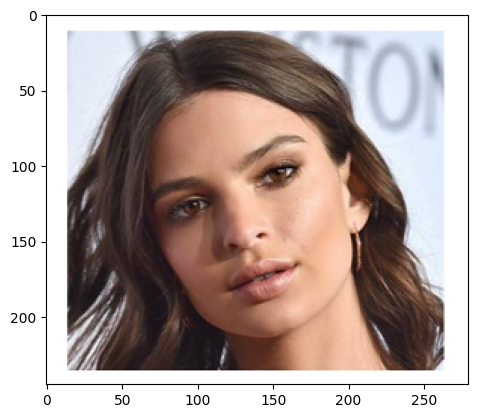

In [15]:
face_image = cv2.imread("./data/face01.png")

face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
face_image_copy = face_image.copy()

plt.imshow(face_image)
plt.show()

## 2. 얼굴 이미지 바운딩 박스 처리

- 캐스케이드의 경우, 그레이 스케일 이미지에서만 작동한다.

얼굴 객체 인식 좌표 :  49 48 161 161


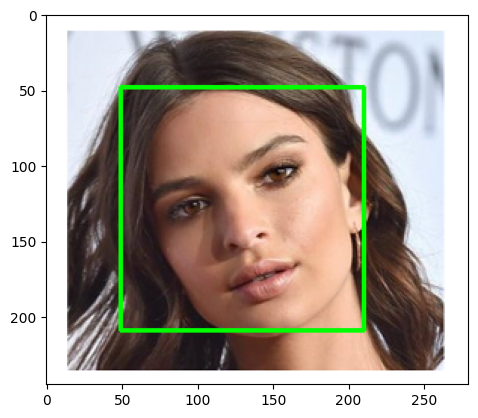

In [16]:
# 그레이 스케일 이미지로 변환
face_gray_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)

faces_box_info = face_cascade.detectMultiScale(face_gray_image, 1.1, 4)

for (x, y, w, h) in faces_box_info : 
    print("얼굴 객체 인식 좌표 : " , x, y, w, h)
    cv2.rectangle(face_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.imshow(face_image)
plt.show()

## 3. 눈 감지 

roi_gray [[138 134  96 ... 240 243 241]
 [142  99  69 ... 241 242 241]
 [118  75  65 ... 236 238 238]
 ...
 [ 52  68  59 ... 201 192 184]
 [ 70  72  66 ... 204 192 189]
 [ 84  64  67 ... 210 194 194]]
roi_color [[[144 135 142]
  [142 131 131]
  [105  93  88]
  ...
  [233 241 251]
  [237 244 254]
  [235 242 252]]

 [[147 139 143]
  [108  96  95]
  [ 79  66  62]
  ...
  [234 242 252]
  [236 243 253]
  [235 242 251]]

 [[123 115 116]
  [ 84  72  70]
  [ 75  61  58]
  ...
  [229 237 246]
  [232 239 248]
  [232 239 248]]

 ...

 [[ 71  45  38]
  [ 87  61  52]
  [ 78  53  42]
  ...
  [239 189 161]
  [230 180 153]
  [221 172 145]]

 [[ 90  63  55]
  [ 91  65  55]
  [ 84  60  49]
  ...
  [241 193 167]
  [230 180 154]
  [227 177 150]]

 [[103  77  68]
  [ 83  58  47]
  [ 84  61  50]
  ...
  [246 199 174]
  [231 182 156]
  [233 182 154]]]
[[31 64 32 32]
 [84 39 38 38]]
0 31 64 32 32
1 84 39 38 38


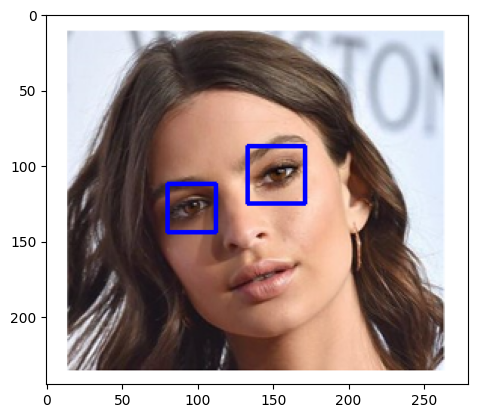

In [17]:
roi_gray = face_gray_image[y: (y + h), x: (x + w)]
roi_color = face_image_copy[y: (y + h), x: (x + w)]

print("roi_gray", roi_gray)
print("roi_color", roi_color)

# Creating variable eyes
eyes_box_info = eye_cascade.detectMultiScale(roi_gray)
index = 0

print(eyes_box_info)

for i , (ex, ey, ew, eh) in enumerate(eyes_box_info):
    print(i, ex, ey, ew, eh)
    if i == 0 :
        eye_1 = (ex, ey, ew, eh)
    elif i == 1 :
        eye_2 = (ex, ey, ew, eh)
    
    # Drawing rectangles around the eyes
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)

    index = index + 1
    
plt.imshow(face_image_copy)
plt.show()

- 두 눈의 중심선 사이에 선을 그어본다. 하지만 그 전에 직사각형 중심점의 좌표를 계산해야 한다.

### 얼굴 정렬 01

In [18]:
print(eye_1[0], eye_2[0])

if eye_1[0] < eye_2[0] :
    left_eye = eye_1
    right_eye = eye_2 
else :
    left_eye = eye_2
    right_eye = eye_1
    
print(left_eye, right_eye)

31 84
(31, 64, 32, 32) (84, 39, 38, 38)


left eye center 좌표 :  47 80
right_eye center 좌표 :  103 58


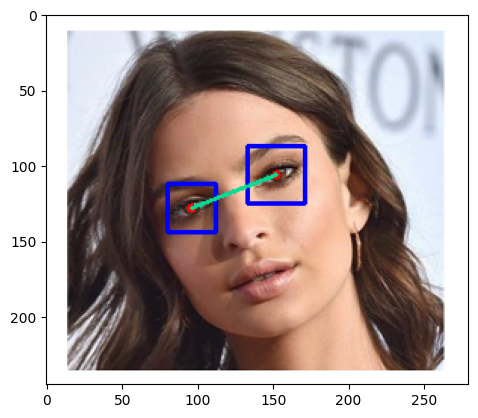

In [19]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_center_x = left_eye_center[0]
left_eye_center_y = left_eye_center[1]

print("left eye center 좌표 : ", left_eye_center_x, left_eye_center_y)

right_eye_center = (int(right_eye[0] + (right_eye[2] / 2)), int(right_eye[1] + (right_eye[3] / 2)))
right_eye_center_x = right_eye_center[0]
right_eye_center_y = right_eye_center[1]

print("right_eye center 좌표 : ", right_eye_center_x, right_eye_center_y)

cv2.circle(roi_color, left_eye_center, 3, (255, 0, 0), -1)
cv2.circle(roi_color, right_eye_center, 3, (255, 0, 0), -1)
cv2.line(roi_color, left_eye_center, right_eye_center, (0, 220, 150), 2)

plt.imshow(face_image_copy)
plt.show()

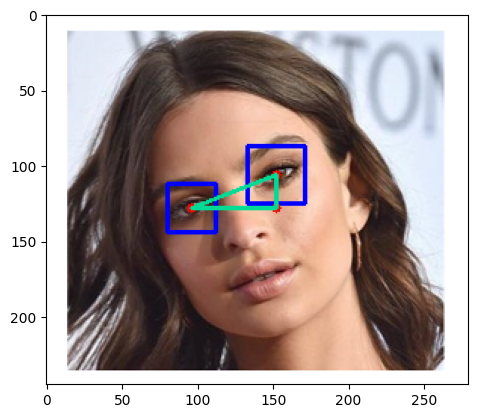

In [20]:
if left_eye_center_y > right_eye_center_y : 
    A = (right_eye_center_x, left_eye_center_y)
    direction = -1
else : 
    A = (left_eye_center_x, right_eye_center_y)
    direction = 1
    
cv2.circle(roi_color, A, 3, (255, 0, 0), -1)
cv2.line(roi_color, left_eye_center, A, (0, 220, 150), 2)
cv2.line(roi_color, right_eye_center, A, (0, 220, 150), 2)

plt.imshow(face_image_copy)
plt.show()

## 4. 각도 계산 

In [21]:
delta_x = right_eye_center_x - left_eye_center_x
delta_y = right_eye_center_y - left_eye_center_y

angle = np.arctan(delta_y / delta_x)
angle = (angle * 180) / np.pi

print(angle)

-21.447736327105353


### 이미지를 각도 세타 만큼 회전 

이미지 height, width 값 >>  245 280
image cneter values >>  (140, 122)
[[  0.93075149  -0.36565237  54.30438035]
 [  0.36565237   0.93075149 -42.74301434]]


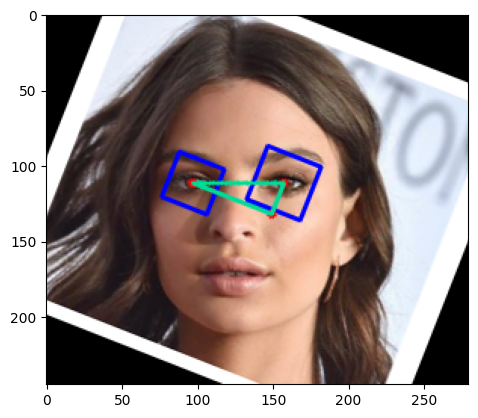

In [22]:
height, width, _ = face_image_copy.shape
print("이미지 height, width 값 >> " , height, width)

image_center = (width // 2 , height // 2)
print("image cneter values >> " , image_center )

M = cv2.getRotationMatrix2D(image_center, (angle), 1.0)
print(M)

rotated = cv2.warpAffine(face_image_copy, M , (width, height))

plt.imshow(rotated)

plt.show()